In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# CREATE
# A Series is, in essence, a single column of a DataFrame. 
ts = pd.Series(
    [1, 3, 5, np.nan, 6, 8], 
    name='Series',
    index=list(range(10, 16))
)
print(ts)

bool_series  = pd.Series(
    [False, True, False], 
    name='Bool Series',
    index=[1,2,3]
)
print(bool_series)
try:
    if bool_series:
        print('True')
except BaseException as err:
    print(err)

if not bool_series.empty:
    print('Not empty')

if pd.Series([True]).bool():
    print('True')

if bool_series.any():
    print('any')

if not bool_series.all():
    print('Not all')

if bool_series is not None:
    print('Not none')

10    1.0
11    3.0
12    5.0
13    NaN
14    6.0
15    8.0
Name: Series, dtype: float64
1    False
2     True
3    False
Name: Bool Series, dtype: bool
The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
Not empty
True
any
Not all
Not none


In [5]:
# help
bool_series?

Type:        Series
String form:
1    False
2     True
3    False
Name: Bool Series, dtype: bool
Length:      3
File:        ~/Documents/python/DS/pandas/venv-ds/lib/python3.10/site-packages/pandas/core/series.py
Docstring:  
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, \*, \*\*) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d

In [6]:
# A DataFrame is a table. It contains an array of individual entries, each of which has a certain value. 
dates = pd.date_range("20130101", periods=6)
frame_rand = pd.DataFrame(
    np.random.randn(6, 3), 
    index=dates, 
    columns=list('ABC')
)
frame_rand

,A,B,C
2013-01-01,0.900234,2.365989,-1.326518
2013-01-02,-0.969962,-0.511904,1.258090
2013-01-03,0.880718,1.301478,-0.210888
2013-01-04,2.554171,2.869835,-1.435420
2013-01-05,0.765241,-1.626190,-1.991800
2013-01-06,-0.604791,1.205989,0.573401


In [7]:
# DataFrame as actually being just a bunch of Series "glued together".
frame_dict = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
# series
print(frame_dict.B)
print(type(frame_dict.B))

print(frame_dict.D.describe())
print(frame_dict.E.describe())

print(frame_dict.describe())
print(frame_dict)

0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
Name: B, dtype: datetime64[ns]
<class 'pandas.core.series.Series'>
count    4.0
mean     3.0
std      0.0
min      3.0
25%      3.0
50%      3.0
75%      3.0
max      3.0
Name: D, dtype: float64
count        4
unique       2
top       test
freq         2
Name: E, dtype: object
         A    C    D
count  4.0  4.0  4.0
mean   1.0  1.0  3.0
std    0.0  0.0  0.0
min    1.0  1.0  3.0
25%    1.0  1.0  3.0
50%    1.0  1.0  3.0
75%    1.0  1.0  3.0
max    1.0  1.0  3.0
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [8]:
print(frame_dict.D.value_counts())
print(frame_dict.E.unique())

3    4
Name: D, dtype: int64
['test', 'train']
Categories (2, object): ['test', 'train']


In [13]:
max_c = frame_dict.max(skipna=True, numeric_only=True).C
min_c = frame_dict.min(skipna=True, numeric_only=True).C
print(max_c, min_c)

1.0 1.0


In [17]:
idx_max = (frame_dict.C / frame_dict.D).idxmax()
print(idx_max)
frame_dict.loc[idx_max, 'C']

0


1.0

In [ ]:
# INFO
frame_dict.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [ ]:

print(frame_rand.describe())


              A         B         C
count  6.000000  6.000000  6.000000
mean   0.133198 -0.233064  0.180176
std    1.589060  0.972867  0.999305
min   -1.899761 -2.082034 -1.549472
25%   -1.164390 -0.321640 -0.122444
50%    0.400952  0.094601  0.317443
75%    1.460284  0.249993  0.870135
max    1.769822  0.653042  1.210346


In [ ]:
frame_rand.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
dtypes: float64(3)
memory usage: 192.0 bytes


In [ ]:
frame_rand.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
dtypes: float64(3)
memory usage: 192.0 bytes


In [ ]:
# VIEW
print(
    frame_rand.head(1).A[0], 
    type(frame_rand.head(1).A[0]),
    frame_rand.head(1).A.iloc[0]
)
frame_rand.head()

0.0 <class 'numpy.float64'> 0.0


,A,B,C,F
2013-01-01,0.000000,0.000000,7,NaN
2013-01-02,1.769822,-2.082034,7,1.0
2013-01-03,1.724992,0.027938,7,2.0
2013-01-04,0.135745,0.161265,7,3.0
2013-01-05,-1.597768,-0.438166,7,4.0


In [ ]:
frame_rand.tail()

,A,B,C
2013-01-02,1.769822,-2.082034,0.412081
2013-01-03,1.724992,0.027938,-0.237527
2013-01-04,0.135745,0.161265,0.222804
2013-01-05,-1.597768,-0.438166,-1.549472
2013-01-06,-1.899761,0.653042,1.022820


In [ ]:
# x
frame_rand.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# y
frame_rand.columns

Index(['A', 'B', 'C'], dtype='object')

In [ ]:
# heavy
# does not include the index or column labels in the output.
frame_rand.to_numpy()

array([[ 0.6661588 ,  0.27956957,  1.21034619],
       [ 1.76982155, -2.08203415,  0.4120812 ],
       [ 1.72499182,  0.0279381 , -0.23752656],
       [ 0.13574476,  0.16126478,  0.2228042 ],
       [-1.59776775, -0.4381659 , -1.54947172],
       [-1.89976149,  0.65304229,  1.02281976]])

In [ ]:
# heavy
# does not include the index or column labels in the output.
frame_dict.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [ ]:
frame_rand.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.666159,1.769822,1.724992,0.135745,-1.597768,-1.899761
B,0.279570,-2.082034,0.027938,0.161265,-0.438166,0.653042
C,1.210346,0.412081,-0.237527,0.222804,-1.549472,1.022820


In [ ]:
# sort by x (index)
frame_rand.sort_index(axis=0, ascending=False)

,A,B,C
2013-01-06,-1.899761,0.653042,1.022820
2013-01-05,-1.597768,-0.438166,-1.549472
2013-01-04,0.135745,0.161265,0.222804
2013-01-03,1.724992,0.027938,-0.237527
2013-01-02,1.769822,-2.082034,0.412081
2013-01-01,0.666159,0.279570,1.210346


In [ ]:
# sort by y (columns)
frame_rand.sort_index(axis=1, ascending=False)

,C,B,A
2013-01-01,1.210346,0.279570,0.666159
2013-01-02,0.412081,-2.082034,1.769822
2013-01-03,-0.237527,0.027938,1.724992
2013-01-04,0.222804,0.161265,0.135745
2013-01-05,-1.549472,-0.438166,-1.597768
2013-01-06,1.022820,0.653042,-1.899761


In [ ]:
frame_rand.sort_values(by='B')

,A,B,C
2013-01-02,1.769822,-2.082034,0.412081
2013-01-05,-1.597768,-0.438166,-1.549472
2013-01-03,1.724992,0.027938,-0.237527
2013-01-04,0.135745,0.161265,0.222804
2013-01-01,0.666159,0.279570,1.210346
2013-01-06,-1.899761,0.653042,1.022820


In [ ]:
# SELECTION
# For production code, we recommend the optimized pandas data access methods, DataFrame.at(), DataFrame.iat(), DataFrame.loc() and DataFrame.iloc().

# columns (series)
print(frame_rand.A[0], type(frame_rand.A[0]))
frame_rand.A


0.0 1.7698215468119998 <class 'numpy.float64'>


2013-01-01    0.000000
2013-01-02    1.769822
2013-01-03    1.724992
2013-01-04    0.135745
2013-01-05   -1.597768
2013-01-06   -1.899761
Freq: D, Name: A, dtype: float64

In [ ]:
# columns (series)
frame_rand['B']

2013-01-01    0.279570
2013-01-02   -2.082034
2013-01-03    0.027938
2013-01-04    0.161265
2013-01-05   -0.438166
2013-01-06    0.653042
Freq: D, Name: B, dtype: float64

In [ ]:
# rows
frame_rand[:2]

,A,B,C
2013-01-01,0.666159,0.279570,1.210346
2013-01-02,1.769822,-2.082034,0.412081


In [ ]:
# rows
frame_rand['20130102': '20130104']

,A,B,C
2013-01-02,1.769822,-2.082034,0.412081
2013-01-03,1.724992,0.027938,-0.237527
2013-01-04,0.135745,0.161265,0.222804


In [ ]:
# by label
# loc use indexes inclusively 0:10 will select entries 0,...,10.
# frame_rand.loc['20130101']
frame_rand.loc[dates[0]]

A    0.666159
B    0.279570
C    1.210346
Name: 2013-01-01 00:00:00, dtype: float64

In [ ]:
# rows, columns
frame_rand.loc['20130102': '20130104', 'A':'C']

,A,B,C
2013-01-02,1.769822,-2.082034,0.412081
2013-01-03,1.724992,0.027938,-0.237527
2013-01-04,0.135745,0.161265,0.222804


In [ ]:
# rows, columns
frame_rand.loc[:, 'A': 'C']

,A,B,C
2013-01-01,0.666159,0.279570,1.210346
2013-01-02,1.769822,-2.082034,0.412081
2013-01-03,1.724992,0.027938,-0.237527
2013-01-04,0.135745,0.161265,0.222804
2013-01-05,-1.597768,-0.438166,-1.549472
2013-01-06,-1.899761,0.653042,1.022820


In [ ]:
frame_rand.loc['20130102': '20130104', :]

,A,B,C
2013-01-02,1.769822,-2.082034,0.412081
2013-01-03,1.724992,0.027938,-0.237527
2013-01-04,0.135745,0.161265,0.222804


In [ ]:
frame_rand.loc[['20130101', '20130102'], ['A', 'C']]

,A,C
2013-01-01,0.666159,1.210346
2013-01-02,1.769822,0.412081


In [ ]:
frame_rand.loc['20130102', :'C']

A    1.769822
B   -2.082034
C    0.412081
Name: 2013-01-02 00:00:00, dtype: float64

In [ ]:
frame_rand.loc['20130102', ['A', 'C']]

A    1.769822
C    0.412081
Name: 2013-01-02 00:00:00, dtype: float64

In [ ]:
frame_rand.loc[dates[0], 'A']

0.6661588031824262

In [ ]:
frame_rand.at[dates[0], 'A']

0.6661588031824262

In [ ]:
# by index
# uses the Python stdlib indexing scheme 0:10 will select entries 0,...,9
frame_rand.iloc[3]

A    0.135745
B    0.161265
C    0.222804
Name: 2013-01-04 00:00:00, dtype: float64

In [ ]:
frame_rand.iloc[-2]

A   -1.597768
B   -0.438166
C   -1.549472
Name: 2013-01-05 00:00:00, dtype: float64

In [ ]:
frame_rand.iloc[3:5, 0:2]

,A,B
2013-01-04,0.135745,0.161265
2013-01-05,-1.597768,-0.438166


In [ ]:
frame_rand.iloc[1:3, :]

,A,B,C
2013-01-02,1.769822,-2.082034,0.412081
2013-01-03,1.724992,0.027938,-0.237527


In [ ]:
frame_rand.iloc[:, 1:3]

,B,C
2013-01-01,0.279570,1.210346
2013-01-02,-2.082034,0.412081
2013-01-03,0.027938,-0.237527
2013-01-04,0.161265,0.222804
2013-01-05,-0.438166,-1.549472
2013-01-06,0.653042,1.022820


In [ ]:
frame_rand.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,1.769822,0.412081
2013-01-03,1.724992,-0.237527
2013-01-05,-1.597768,-1.549472


In [ ]:
frame_rand.iloc[0, :3]

A    0.666159
B    0.279570
C    1.210346
Name: 2013-01-01 00:00:00, dtype: float64

In [ ]:
frame_rand.iloc[1, [0, 2]]

A    1.769822
C    0.412081
Name: 2013-01-02 00:00:00, dtype: float64

In [ ]:
frame_rand.iloc[1, 1]

-2.082034149600572

In [ ]:
print(type(frame_rand.iat[1, 1]))
frame_rand.iat[1, 1]

<class 'numpy.float64'>


-2.082034149600572

In [ ]:
# by bool index
frame_rand[frame_rand['A'] > 0]

,A,B,C
2013-01-01,0.666159,0.279570,1.210346
2013-01-02,1.769822,-2.082034,0.412081
2013-01-03,1.724992,0.027938,-0.237527
2013-01-04,0.135745,0.161265,0.222804


In [ ]:
frame_rand[frame_rand > 0]

,A,B,C
2013-01-01,0.666159,0.279570,1.210346
2013-01-02,1.769822,NaN,0.412081
2013-01-03,1.724992,0.027938,NaN
2013-01-04,0.135745,0.161265,0.222804
2013-01-05,NaN,NaN,NaN
2013-01-06,NaN,0.653042,1.022820


In [ ]:
frame_rand_copy = frame_rand.copy()

# Series and DataFrame have comparison methods eq, ne, lt, gt, le, and ge
frame_rand.gt(frame_rand_copy)

,A,B,C
2013-01-01,False,False,False
2013-01-02,False,False,False
2013-01-03,False,False,False
2013-01-04,False,False,False
2013-01-05,False,False,False
2013-01-06,False,False,False


In [ ]:
frame_rand.eq(frame_rand_copy)

,A,B,C
2013-01-01,True,True,True
2013-01-02,True,True,True
2013-01-03,True,True,True
2013-01-04,True,True,True
2013-01-05,True,True,True
2013-01-06,True,True,True


In [ ]:
# in
ts = pd.Series(range(5), index=list("abcde"))
print(2 in ts)
print('b' in ts)
ts.isin([2])

False
True


a    False
b    False
c     True
d    False
e    False
dtype: bool

In [ ]:

frame_rand_copy['D'] = ['one', 'one', 'two', 'three', 'four', 'three']
frame_rand_copy

,A,B,C,D
2013-01-01,0.666159,0.279570,1.210346,one
2013-01-02,1.769822,-2.082034,0.412081,one
2013-01-03,1.724992,0.027938,-0.237527,two
2013-01-04,0.135745,0.161265,0.222804,three
2013-01-05,-1.597768,-0.438166,-1.549472,four
2013-01-06,-1.899761,0.653042,1.022820,three


In [ ]:
frame_rand_copy[frame_rand_copy['D'].isin(['two', 'four'])]

,A,B,C,D
2013-01-03,1.724992,0.027938,-0.237527,two
2013-01-05,-1.597768,-0.438166,-1.549472,four


In [ ]:
# SETTING
# setting a new column automatically aligns the data by the indexes
new_column = pd.Series(
    list(range(1,7)), index=pd.date_range('20130102', periods=6)
)

frame_rand['F'] = new_column
frame_rand

,A,B,C,F
2013-01-01,0.666159,0.279570,1.210346,NaN
2013-01-02,1.769822,-2.082034,0.412081,1.0
2013-01-03,1.724992,0.027938,-0.237527,2.0
2013-01-04,0.135745,0.161265,0.222804,3.0
2013-01-05,-1.597768,-0.438166,-1.549472,4.0
2013-01-06,-1.899761,0.653042,1.022820,5.0


In [ ]:
frame_rand.at[dates[0], 'A'] = 0
frame_rand.iat[0, 1] = 0
frame_rand.loc[:, 'C'] =  np.array([5] * len(frame_rand))

frame_rand

/var/folders/df/sx2bgp556_zdmy1sk4fflv_w0000gp/T/ipykernel_2138/914599329.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  frame_rand.loc[:, 'C'] =  np.array([5] * len(frame_rand))


,A,B,C,F
2013-01-01,0.000000,0.000000,5,NaN
2013-01-02,1.769822,-2.082034,5,1.0
2013-01-03,1.724992,0.027938,5,2.0
2013-01-04,0.135745,0.161265,5,3.0
2013-01-05,-1.597768,-0.438166,5,4.0
2013-01-06,-1.899761,0.653042,5,5.0


In [ ]:

frame_rand[frame_rand.columns[2]] = np.array([6] * len(frame_rand))
frame_rand

,A,B,C,F
2013-01-01,0.000000,0.000000,6,NaN
2013-01-02,1.769822,-2.082034,6,1.0
2013-01-03,1.724992,0.027938,6,2.0
2013-01-04,0.135745,0.161265,6,3.0
2013-01-05,-1.597768,-0.438166,6,4.0
2013-01-06,-1.899761,0.653042,6,5.0


In [ ]:
frame_rand.isetitem(2, np.array([7] * len(frame_rand)))
frame_rand

,A,B,C,F
2013-01-01,0.000000,0.000000,7,NaN
2013-01-02,1.769822,-2.082034,7,1.0
2013-01-03,1.724992,0.027938,7,2.0
2013-01-04,0.135745,0.161265,7,3.0
2013-01-05,-1.597768,-0.438166,7,4.0
2013-01-06,-1.899761,0.653042,7,5.0


In [ ]:

frame_rand_copy = frame_rand.copy()
frame_rand_copy[frame_rand > 0] = -frame_rand
frame_rand

,A,B,C,F
2013-01-01,0.000000,0.000000,7,NaN
2013-01-02,1.769822,-2.082034,7,1.0
2013-01-03,1.724992,0.027938,7,2.0
2013-01-04,0.135745,0.161265,7,3.0
2013-01-05,-1.597768,-0.438166,7,4.0
2013-01-06,-1.899761,0.653042,7,5.0


In [ ]:
# MISSING DATA
# pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations

# reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data
frame_rand_reindex = frame_rand.reindex(
    index=dates[:4], columns=list(frame_rand.columns) + ['E']
)
frame_rand_reindex.loc[dates[0]: dates[1], 'E'] = 1
frame_rand_reindex

,A,B,C,F,E
2013-01-01,0.000000,0.000000,7,NaN,1.0
2013-01-02,1.769822,-2.082034,7,1.0,1.0
2013-01-03,1.724992,0.027938,7,2.0,NaN
2013-01-04,0.135745,0.161265,7,3.0,NaN


In [ ]:
frame_rand_reindex.dropna(how='any')

,A,B,C,F,E
2013-01-02,1.769822,-2.082034,7,1.0,1.0


In [ ]:
frame_rand_reindex.fillna(value=5)

,A,B,C,F,E
2013-01-01,0.000000,0.000000,7,5.0,1.0
2013-01-02,1.769822,-2.082034,7,1.0,1.0
2013-01-03,1.724992,0.027938,7,2.0,5.0
2013-01-04,0.135745,0.161265,7,3.0,5.0


In [ ]:
pd.isna(frame_rand_reindex)

,A,B,C,F,E
2013-01-01,False,False,False,True,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


In [ ]:
frame_rand.set_index('A')

,B,C,F
A,,,
0.000000,0.000000,7,NaN
1.769822,-2.082034,7,1.0
1.724992,0.027938,7,2.0
0.135745,0.161265,7,3.0
-1.597768,-0.438166,7,4.0
-1.899761,0.653042,7,5.0


In [ ]:
# OPERATIONS
# operations in general exclude missing data.

# stats
ft = pd.DataFrame([[1,2,3], [2,4,8], [16,32,64]])
print(ft)
print(f'mean: {ft.mean()}')
print(f'median: {ft.median()}')



    0   1   2
0   1   2   3
1   2   4   8
2  16  32  64
mean: 0     6.333333
1    12.666667
2    25.000000
dtype: float64
median: 0    2.0
1    4.0
2    8.0
dtype: float64


In [ ]:
frame_rand.mean()

A    0.022171
B   -0.279659
C    7.000000
F    3.000000
dtype: float64

In [ ]:
# x (index)
frame_rand.mean(axis=0)

A    0.022171
B   -0.279659
C    7.000000
F    3.000000
dtype: float64

In [ ]:
# y (column)
frame_rand.mean(1)

2013-01-01    2.333333
2013-01-02    1.921947
2013-01-03    2.688232
2013-01-04    2.574252
2013-01-05    2.241017
2013-01-06    2.688320
Freq: D, dtype: float64

In [ ]:
# operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

series_rand = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

frame_rand.sub(series_rand, axis='index')

,A,B,C,F
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,0.724992,-0.972062,6.0,1.0
2013-01-04,-2.864255,-2.838735,4.0,0.0
2013-01-05,-6.597768,-5.438166,2.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN


In [ ]:
# map
print(frame_rand.C.map(lambda x: x + 1))
print(frame_rand.C - 1)
# apply
frame_rand.apply(np.cumsum, axis=0)

2013-01-01    8
2013-01-02    8
2013-01-03    8
2013-01-04    8
2013-01-05    8
2013-01-06    8
Freq: D, Name: C, dtype: int64
2013-01-01    6
2013-01-02    6
2013-01-03    6
2013-01-04    6
2013-01-05    6
2013-01-06    6
Freq: D, Name: C, dtype: int64


,A,B,C,F
2013-01-01,0.000000,0.000000,7,NaN
2013-01-02,1.769822,-2.082034,14,1.0
2013-01-03,3.494813,-2.054096,21,3.0
2013-01-04,3.630558,-1.892831,28,6.0
2013-01-05,2.032790,-2.330997,35,10.0
2013-01-06,0.133029,-1.677955,42,15.0


In [ ]:
# frame_rand.max() - frame_rand.min() 
frame_rand.apply(lambda x: x.max() - x.min())

A    3.669583
B    2.735076
C    0.000000
F    4.000000
dtype: float64

In [ ]:
# histogramming
frame_rand.loc[:, 'A'].value_counts()

 0.000000    1
 1.769822    1
 1.724992    1
 0.135745    1
-1.597768    1
-1.899761    1
Name: A, dtype: int64

In [ ]:
pd.Series(np.random.randint(0, 7, size=10)).value_counts()

1    3
0    2
6    2
3    1
5    1
2    1
dtype: int64

In [ ]:
# string
string = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"]
)
string.str.lower()


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [ ]:
string.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

In [ ]:
string.str.capitalize()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    Caba
7     Dog
8     Cat
dtype: object

In [ ]:
# MERGE
# adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it.
ft = pd.DataFrame(np.random.randn(10, 4))
ft

,0,1,2,3
0,0.183522,-1.125585,0.859096,0.570388
1,0.032430,0.402096,-0.253606,0.483459
2,0.253763,1.111431,-0.041992,0.423995
3,0.443105,0.668216,-0.473235,-2.262803
4,-0.718373,0.152117,0.616544,-1.896072
5,-1.590020,1.340191,-0.270394,-0.846373
6,-0.846484,-0.580123,-2.489602,-0.122207
7,1.248720,-1.482023,-1.394815,-0.176259
8,0.867697,1.110116,-0.511145,-1.646659
9,-0.565769,-0.009141,-0.003494,0.450746


In [ ]:
pieces = [ft[:3], ft[3:7], ft[7:]]
pieces

[          0         1         2         3
 0  0.183522 -1.125585  0.859096  0.570388
 1  0.032430  0.402096 -0.253606  0.483459
 2  0.253763  1.111431 -0.041992  0.423995,
           0         1         2         3
 3  0.443105  0.668216 -0.473235 -2.262803
 4 -0.718373  0.152117  0.616544 -1.896072
 5 -1.590020  1.340191 -0.270394 -0.846373
 6 -0.846484 -0.580123 -2.489602 -0.122207,
           0         1         2         3
 7  1.248720 -1.482023 -1.394815 -0.176259
 8  0.867697  1.110116 -0.511145 -1.646659
 9 -0.565769 -0.009141 -0.003494  0.450746]

In [ ]:
pd.concat(pieces)

,0,1,2,3
0,0.183522,-1.125585,0.859096,0.570388
1,0.032430,0.402096,-0.253606,0.483459
2,0.253763,1.111431,-0.041992,0.423995
3,0.443105,0.668216,-0.473235,-2.262803
4,-0.718373,0.152117,0.616544,-1.896072
5,-1.590020,1.340191,-0.270394,-0.846373
6,-0.846484,-0.580123,-2.489602,-0.122207
7,1.248720,-1.482023,-1.394815,-0.176259
8,0.867697,1.110116,-0.511145,-1.646659
9,-0.565769,-0.009141,-0.003494,0.450746


In [ ]:
# join
# enables SQL style join types along specific columns.
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left


,key,lval
0,foo,1
1,foo,2


In [ ]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [ ]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [ ]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [19]:
# GROUP
# Splitting the data into groups based on some criteria
# Applying a function to each group independently
# Combining the results into a data structure

ft = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
ft

,A,B,C,D
0,foo,one,0.865833,0.287149
1,bar,one,-0.115830,1.041344
2,foo,two,-0.660327,0.115040
3,bar,three,-0.994362,-0.366934
4,foo,two,0.622285,-1.368350
5,bar,two,0.155505,2.195332
6,foo,one,0.535375,-0.458873
7,foo,three,-0.380840,-1.589668


In [23]:
# value_counts() is just a shortcut to this groupby() operation
print(ft.B.value_counts())
print(ft.groupby('B').D.count())

one      3
two      3
three    2
Name: B, dtype: int64
B
one      3
three    2
two      3
Name: D, dtype: int64


In [ ]:
ft.groupby('A')[['C', 'D']].value_counts()

A    C          D        
bar  -0.712383  -0.393472    1
      0.673403   0.628434    1
      1.589845  -0.700756    1
foo  -1.920581  -0.138709    1
      0.234456   0.480985    1
      0.345278   0.082955    1
      0.612132   0.696805    1
      0.909123   0.161010    1
dtype: int64

In [27]:
ft.groupby('A').apply(
    lambda df: df.C.loc[df.C.idxmax()]
)

A
bar    0.155505
foo    0.865833
dtype: float64

In [ ]:
ft.groupby('A')[['C', 'D']].sum()

,C,D
A,,
bar,1.550865,-0.465793
foo,0.180408,1.283047


In [ ]:
ft.groupby(['A', 'B']).value_counts()

A    B      C          D        
bar  one     1.589845  -0.700756    1
     three  -0.712383  -0.393472    1
     two     0.673403   0.628434    1
foo  one    -1.920581  -0.138709    1
             0.909123   0.161010    1
     three   0.345278   0.082955    1
     two     0.234456   0.480985    1
             0.612132   0.696805    1
dtype: int64

In [24]:
ft.groupby(['A', 'B']).count()

C  D
A   B          
bar one    1  1
    three  1  1
    two    1  1
foo one    2  2
    three  1  1
    two    2  2

In [25]:
ft.groupby(['A', 'B']).size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [ ]:
ft.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.589845 -0.700756
    three -0.712383 -0.393472
    two    0.673403  0.628434
foo one   -1.011459  0.022302
    three  0.345278  0.082955
    two    0.846588  1.177791

In [ ]:
# RESHAPE

# stack
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)
tuples


[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [ ]:
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
ft = pd.DataFrame(np.random.randn(8, 2), index=multi_index, columns=['A', 'B'])

ft2 = ft[:4]
ft2

A         B
first second                    
bar   one     2.489978  1.149610
      two     0.072918 -0.252799
baz   one    -0.658160 -1.124359
      two     0.122130 -1.704969

In [ ]:
stacked = ft2.stack()
stacked

first  second   
bar    one     A    2.489978
               B    1.149610
       two     A    0.072918
               B   -0.252799
baz    one     A   -0.658160
               B   -1.124359
       two     A    0.122130
               B   -1.704969
dtype: float64

In [ ]:
# with a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level.
stacked.unstack()

A         B
first second                    
bar   one     2.489978  1.149610
      two     0.072918 -0.252799
baz   one    -0.658160 -1.124359
      two     0.122130 -1.704969

In [ ]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  2.489978 -0.658160
       B  1.149610 -1.124359
two    A  0.072918  0.122130
       B -0.252799 -1.704969

In [ ]:
stacked.unstack(1)

second        one       two
first                      
bar   A  2.489978  0.072918
      B  1.149610 -0.252799
baz   A -0.658160  0.122130
      B -1.124359 -1.704969

In [ ]:
# pivot
ft = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
ft

,A,B,C,D,E
0,one,A,foo,0.639411,0.248968
1,one,B,foo,1.884873,-0.704621
2,two,C,foo,-0.181103,-0.207400
3,three,A,bar,-0.340449,0.703384
4,one,B,bar,-0.448094,-0.180547
5,one,C,bar,1.282296,-1.078722
6,two,A,foo,-0.608248,-0.483572
7,three,B,foo,-0.655165,0.423552
8,one,C,foo,0.319680,0.788945
9,one,A,bar,-1.096726,-0.290732


In [ ]:
# pivot_table() pivots a DataFrame specifying the values, index and columns
pd.pivot_table(ft, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.096726  0.639411
      B -0.448094  1.884873
      C  1.282296  0.319680
three A -0.340449       NaN
      B       NaN -0.655165
      C  0.578525       NaN
two   A       NaN -0.608248
      B  0.029663       NaN
      C       NaN -0.181103

In [ ]:
# TIME SERIES
# resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data)
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts_resample = ts.resample('5Min').sum()
ts_resample

2012-01-01    25924
Freq: 5T, dtype: int64

In [ ]:
ts.sum() == ts_resample

2012-01-01    True
Freq: 5T, dtype: bool

In [ ]:
# Series.tz_localize() localizes a time series to a time zone
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.265038
2012-03-07    0.365582
2012-03-08    0.220360
2012-03-09    1.014050
2012-03-10    0.133492
Freq: D, dtype: float64

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -1.265038
2012-03-07 00:00:00+00:00    0.365582
2012-03-08 00:00:00+00:00    0.220360
2012-03-09 00:00:00+00:00    1.014050
2012-03-10 00:00:00+00:00    0.133492
Freq: D, dtype: float64

In [ ]:
# Series.tz_convert() converts a timezones series to another time zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.265038
2012-03-06 19:00:00-05:00    0.365582
2012-03-07 19:00:00-05:00    0.220360
2012-03-08 19:00:00-05:00    1.014050
2012-03-09 19:00:00-05:00    0.133492
Freq: D, dtype: float64

In [ ]:
# converting between time span representations
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.720062
2012-02-29    0.510235
2012-03-31   -1.802245
2012-04-30    2.170858
2012-05-31   -0.827733
Freq: M, dtype: float64

In [ ]:
ps = ts.to_period()
ps

2012-01    1.720062
2012-02    0.510235
2012-03   -1.802245
2012-04    2.170858
2012-05   -0.827733
Freq: M, dtype: float64

In [ ]:
ps.to_timestamp()

2012-01-01    1.720062
2012-02-01    0.510235
2012-03-01   -1.802245
2012-04-01    2.170858
2012-05-01   -0.827733
Freq: MS, dtype: float64

In [ ]:
# Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end
prng = pd.period_range('1998Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1998Q1   -0.034252
1998Q2   -1.269294
1998Q3    0.917522
1998Q4    1.538693
1999Q1   -0.368177
1999Q2    0.692414
1999Q3    1.209357
1999Q4   -0.166767
2000Q1   -0.342695
2000Q2   -0.100585
2000Q3    0.935844
2000Q4    0.128012
Freq: Q-NOV, dtype: float64

In [ ]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1998-03-01 09:00   -0.034252
1998-06-01 09:00   -1.269294
1998-09-01 09:00    0.917522
1998-12-01 09:00    1.538693
1999-03-01 09:00   -0.368177
Freq: H, dtype: float64

In [ ]:
# CATEGORICALS
ft = pd.DataFrame(
    {'id': [1, 2, 3, 4, 5, 6], 'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']}
)
ft.dtypes

id            int64
raw_grade    object
dtype: object

In [ ]:
# set category
ft['grade'] = ft['raw_grade'].astype('category')
ft['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [ ]:
ft.dtypes

id              int64
raw_grade      object
grade        category
dtype: object

In [ ]:
# rename the categories to more meaningful names
new_categories = ["very good", "good", "very bad"]

ft['grade'] = ft['grade'].cat.rename_categories(new_categories)
ft

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [ ]:
# reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default
ft['grade'] = ft['grade'].cat.set_categories(
    ['very bad', 'bad', 'medium', 'good', 'very good']
)
ft['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [ ]:
ft.sort_values(by='grade',ascending=False)

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


In [ ]:
ft.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [ ]:
# PLOTTING
import matplotlib.pyplot as plt
# plt.close method is used to close a figure window
plt.close('all')

<Axes: >

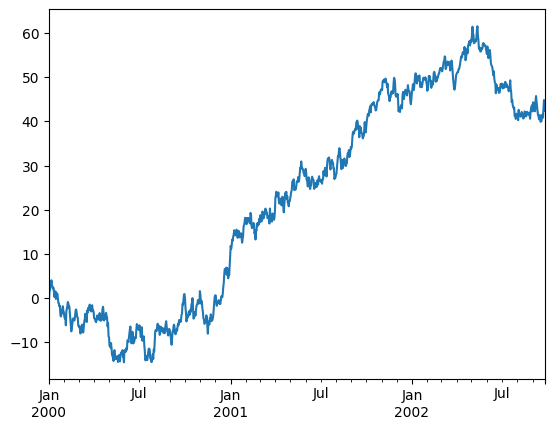

In [ ]:
ts = pd.Series(
    np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000)
)
ts = ts.cumsum()
ts.plot()
# If running under Jupyter Notebook, the plot will appear on plot(). Otherwise use matplotlib.pyplot.show to show it or matplotlib.pyplot.savefig to write it to a file.

<Figure size 640x480 with 0 Axes>

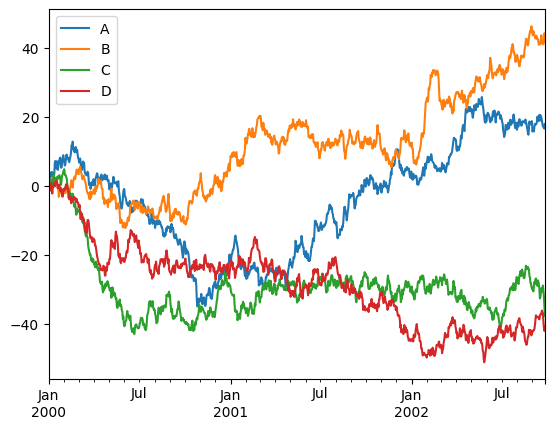

In [ ]:
ft = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D']
)
ft = ft.cumsum()
plt.figure()
ft.plot()
plt.legend(loc='best')


In [ ]:
# IMPORT EXPORT
# csv
frame_rand.to_csv('frame_rand.csv')
pd.read_csv('frame_rand.csv', index_col=0)

,A,B,C,F
2013-01-01,0.000000,0.000000,7,NaN
2013-01-02,1.769822,-2.082034,7,1.0
2013-01-03,1.724992,0.027938,7,2.0
2013-01-04,0.135745,0.161265,7,3.0
2013-01-05,-1.597768,-0.438166,7,4.0
2013-01-06,-1.899761,0.653042,7,5.0


In [ ]:
# hdf5
frame_rand.to_hdf('frame_rand.h5', 'df')
pd.read_hdf('frame_rand.h5', 'df')

,A,B,C,F
2013-01-01,0.000000,0.000000,7,NaN
2013-01-02,1.769822,-2.082034,7,1.0
2013-01-03,1.724992,0.027938,7,2.0
2013-01-04,0.135745,0.161265,7,3.0
2013-01-05,-1.597768,-0.438166,7,4.0
2013-01-06,-1.899761,0.653042,7,5.0


In [ ]:
# excel
frame_rand.to_excel('frame_rand.xlsx', sheet_name='frame_rand')
pd.read_excel("frame_rand.xlsx", "frame_rand", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,F
0,2013-01-01,0.000000,0.000000,7,NaN
1,2013-01-02,1.769822,-2.082034,7,1.0
2,2013-01-03,1.724992,0.027938,7,2.0
3,2013-01-04,0.135745,0.161265,7,3.0
4,2013-01-05,-1.597768,-0.438166,7,4.0
5,2013-01-06,-1.899761,0.653042,7,5.0
